In [400]:
import matplotlib.pyplot as plt
import pylab as plab
import numpy as np
from math import exp
from sympy import symbols, solve


def y1(R,a,x,N):
    #R = R/N #R fixed, concentration assumption, both fixed for crowding assumption
    #a = a*N
    return R*a*exp(-a*x)/N+(N-1)/N*R*(1-exp(-a*x))/x #multiply by N for total transporters
def y2(x,k):
    return k
def nut(R,a,x,N):
    #return R/N*(1-exp(-a*x*N))-0.0055*x
    #R = R/N
    #a = a*N
    return R*(1-exp(-a*x))-0.0055*x
def nocost(R,a,x):
    return R*(1-exp(-a*x))

nut = np.vectorize(nut)
nocost = np.vectorize(nocost)
y2 = np.vectorize(y2)
y1 = np.vectorize(y1)

k = 0.0055
R = 10000
#Rgly = 20000
Rnon = 7000
a = 1/500000
agly = 1/800000
N1 = 1
N2 = 5
N3 = 10
N4 = 50
N5 = 100

x = np.arange(1,2000000,1000)

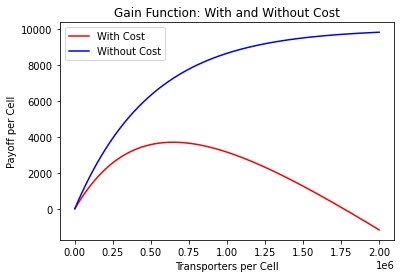

In [378]:
#Plots of Nutrient Uptake

plt.plot(x,nut(R,a,x,N1),'r',label='With Cost')
plt.plot(x,nocost(R,a,x),'b',label='Without Cost')

leg = plt.legend()
plt.title('Gain Function: With and Without Cost')
plt.ylabel('Payoff per Cell')
plt.xlabel('Transporters per Cell')
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.savefig('ePlot',bbox_inches='tight')
plt.show()

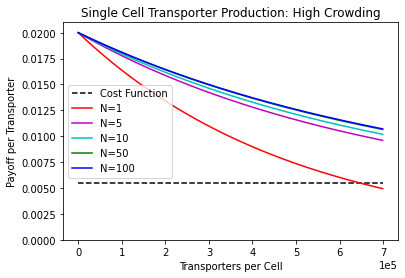

In [379]:
#Plots of High Crowding Transporter Assumption
x = np.arange(1,700000,1000)

plt.plot(x,y2(x,k),'--k',label='Cost Function')
plt.plot(x,y1(R,a,x,N1),'r',label='N=1')
plt.plot(x,y1(R,a,x,N2),'m',label='N=5')
plt.plot(x,y1(R,a,x,N3),'c',label='N=10')
plt.plot(x,y1(R,a,x,N4),'g',label='N=50')
plt.plot(x,y1(R,a,x,N5),'b',label='N=100')

leg = plt.legend()
plt.title('Single Cell Transporter Production: High Crowding')
plt.ylabel('Payoff per Transporter')
plt.ylim(0,0.021)
plt.xlabel('Transporters per Cell')
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.savefig('RFix',bbox_inches='tight')
plt.show()

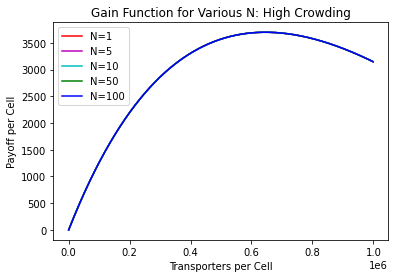

In [380]:
#Plots of Depletion Zone: High Crowding Gain Function
x = np.arange(1,1000000,1000)

plt.plot(x,nut(R,a,x,N1),'r',label='N=1')
plt.plot(x,nut(R,a,x,N2),'m',label='N=5')
plt.plot(x,nut(R,a,x,N3),'c',label='N=10')
plt.plot(x,nut(R,a,x,N4),'g',label='N=50')
plt.plot(x,nut(R,a,x,N5),'b',label='N=100')

leg = plt.legend()
plt.title('Gain Function for Various N: High Crowding')
plt.ylabel('Payoff per Cell')
plt.xlabel('Transporters per Cell')
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.savefig('Crowd_Gain',bbox_inches='tight')
plt.show()

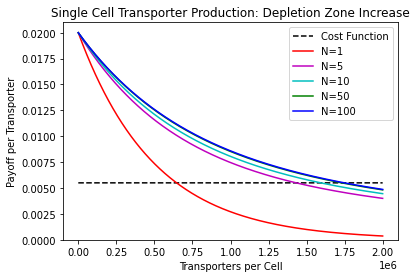

In [381]:
#Plots of Depletion Zone Increase Transporter Assumption
x = np.arange(1,2000000,1000)

plt.plot(x,y2(x,k),'--k',label='Cost Function')
plt.plot(x,y1(R,a,x,N1),'r',label='N=1')
plt.plot(x,y1(R,a,x,N2),'m',label='N=5')
plt.plot(x,y1(R,a,x,N3),'c',label='N=10')
plt.plot(x,y1(R,a,x,N4),'g',label='N=50')
plt.plot(x,y1(R,a,x,N5),'b',label='N=100')

leg = plt.legend()
plt.title('Single Cell Transporter Production: Depletion Zone Increase')
plt.ylabel('Payoff per Transporter')
plt.ylim(0,0.021)
plt.xlabel('Transporters per Cell')
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.savefig('TransEquil',bbox_inches='tight')
plt.show()

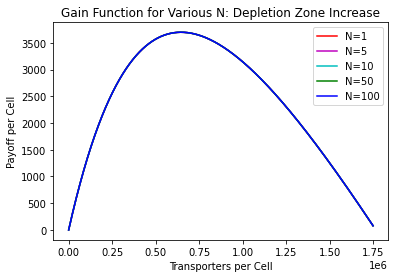

In [382]:
#Plots of Depletion Zone Gain Function Assumption
x = np.arange(1,1750000,1000)

plt.plot(x,nut(R,a,x,N1),'r',label='N=1')
plt.plot(x,nut(R,a,x,N2),'m',label='N=5')
plt.plot(x,nut(R,a,x,N3),'c',label='N=10')
plt.plot(x,nut(R,a,x,N4),'g',label='N=50')
plt.plot(x,nut(R,a,x,N5),'b',label='N=100')

leg = plt.legend()
plt.title('Gain Function for Various N: Depletion Zone Increase')
plt.ylabel('Payoff per Cell')
plt.xlabel('Transporters per Cell')
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.savefig('Dep_Gain',bbox_inches='tight')
plt.show()

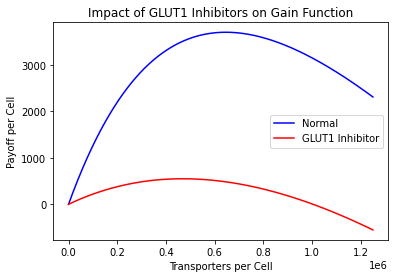

In [383]:
#GLUT1 Gain Function
x = np.arange(1,1250000,1000)

plt.plot(x,nut(R,a,x,N1),'b',label='Normal')
plt.plot(x,nut(R,agly,x,N1),'r',label='GLUT1 Inhibitor')

leg = plt.legend()
plt.title('Impact of GLUT1 Inhibitors on Gain Function')
plt.ylabel('Payoff per Cell')
plt.xlabel('Transporters per Cell')
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.savefig('GLUT1',bbox_inches='tight')
plt.show()

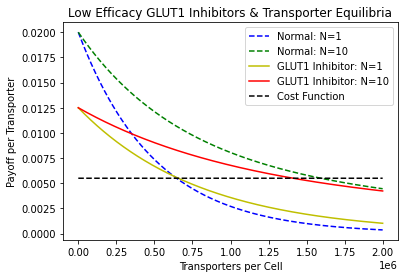

In [401]:
#GLUT1 Transporter Equilibria
x = np.arange(1,2000000,1000)

plt.plot(x,y1(R,a,x,N1),'--b',label='Normal: N=1')
plt.plot(x,y1(R,a,x,N3),'--g',label='Normal: N=10')
plt.plot(x,y1(R,agly,x,N1),'y',label='GLUT1 Inhibitor: N=1')
plt.plot(x,y1(R,agly,x,N3),'r',label='GLUT1 Inhibitor: N=10')
plt.plot(x,y2(x,k),'--k',label='Cost Function')


leg = plt.legend()
plt.title('Low Efficacy GLUT1 Inhibitors & Transporter Equilibria')
plt.ylabel('Payoff per Transporter')
plt.xlabel('Transporters per Cell')
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.savefig('GLUT1Trans',bbox_inches='tight')
plt.show()

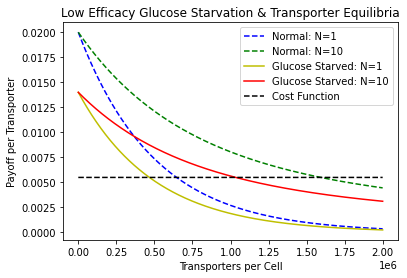

In [394]:
#Glucose Starvation Transporter Equilibria
x = np.arange(1,2000000,1000)

plt.plot(x,y1(R,a,x,N1),'--b',label='Normal: N=1')
plt.plot(x,y1(R,a,x,N3),'--g',label='Normal: N=10')
plt.plot(x,y1(Rnon,a,x,N1),'y',label='Glucose Starved: N=1')
plt.plot(x,y1(Rnon,a,x,N3),'r',label='Glucose Starved: N=10')
plt.plot(x,y2(x,k),'--k',label='Cost Function')


leg = plt.legend()
plt.title('Low Efficacy Glucose Starvation & Transporter Equilibria')
plt.ylabel('Payoff per Transporter')
plt.xlabel('Transporters per Cell')
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.savefig('HypoT',bbox_inches='tight')
plt.show()

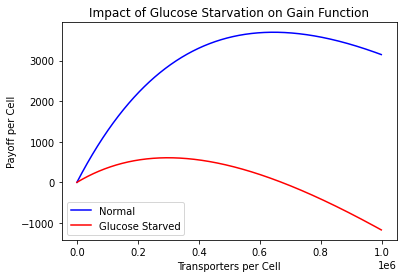

In [293]:
#Glucose Starvation Gain Function
x = np.arange(1,1000000,1000)

plt.plot(x,nut(R,a,x,N1),'b',label='Normal')
plt.plot(x,nut(Rnon,a,x,N1),'r',label='Glucose Starved')

leg = plt.legend()
plt.title('Impact of Glucose Starvation on Gain Function')
plt.ylabel('Payoff per Cell')
plt.xlabel('Transporters per Cell')
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.savefig('Hypo',bbox_inches='tight')
plt.show()

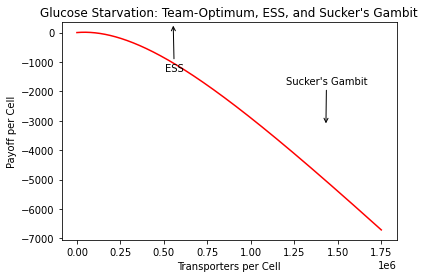

In [267]:
#Sucker's Gambit
x = np.arange(1,1750000,1000)

plt.plot(x,nut(Rnon,a,x,N2),'r')

plt.title('Glucose Starvation: Team-Optimum, ESS, and Sucker\'s Gambit')
plt.ylabel('Payoff per Cell')
plt.xlabel('Transporters per Cell')
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.annotate("Team-Optimum", xy=(298919, 606), va='center',xytext=(80000, 606-1000),arrowprops=dict(arrowstyle="->"))
plt.annotate("ESS", xy=(553319, 303), va='center',xytext=(505000, 303-1500),arrowprops=dict(arrowstyle="->"))
plt.annotate("Sucker's Gambit", xy=(1430884, -3156), va='center',xytext=(1200000, -3156+1500),arrowprops=dict(arrowstyle="->"))

plt.savefig('SGIll',bbox_inches='tight')
plt.show()

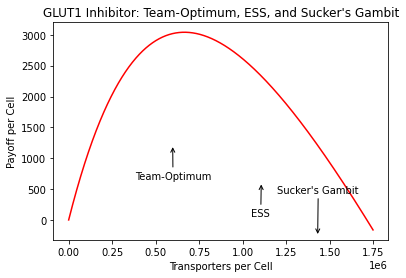

In [268]:
#Sucker's Gambit
x = np.arange(1,1750000,1000)

plt.plot(x,nut(R,agly,x,N2),'r')

plt.title('GLUT1 Inhibitor: Team-Optimum, ESS, and Sucker\'s Gambit')
plt.ylabel('Payoff per Cell')
plt.xlabel('Transporters per Cell')
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.annotate("Team-Optimum", xy=(597837, 1212), va='center',xytext=(380000, 1212-500),arrowprops=dict(arrowstyle="->"))
plt.annotate("ESS", xy=(1106639, 607), va='center',xytext=(1050000, 607-500),arrowprops=dict(arrowstyle="->"))
plt.annotate("Sucker's Gambit", xy=(1430884, -260), va='center',xytext=(1200000, -260+750),arrowprops=dict(arrowstyle="->"))

plt.savefig('SGIll2',bbox_inches='tight')
plt.show()

3699.9999993709703
-35.077905448632514


/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log


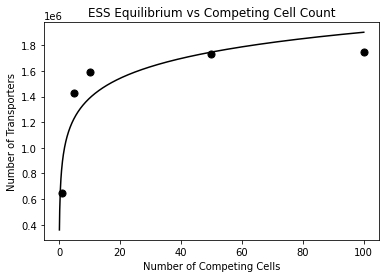

In [269]:
from scipy.optimize import curve_fit
xdata=[1,5,10,50,100]
ydata=[3700,1558,827,172,86]
xdata = np.asarray(xdata)
ydata = np.asarray(ydata)
def LogF(x, A, B):
    y = A*np.log(x)+B
    return y

def Power(x, A, B):
    y = A*x**B
    return y
parameters, covariance = curve_fit(Power, xdata, ydata)
fit_A = parameters[0]
fit_B = parameters[1]
print(fit_A)
print(fit_B)
fit_y = Power(xdata, fit_A, fit_B)

data = np.array([[1, 645492],[5, 1430884],[10, 1592629],[50,1729743],[100,1747277]])
ar = np.linspace(0,100,1000)
x, y = data.T
plt.scatter(x,y,color='k',s=50)
plt.title('ESS Equilibrium vs Competing Cell Count')
plt.ylabel('Number of Transporters')
plt.xlabel('Number of Competing Cells')
plt.plot(ar,223556*np.log(ar) + 873480,color='k')
#plt.plot(ar,4722*ar**(-0.838),color='k')
plt.show()


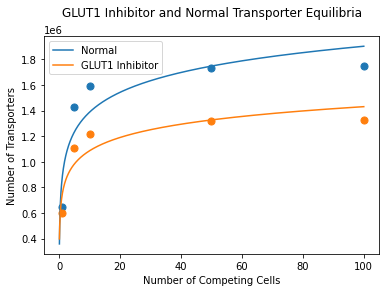

In [270]:
data1 = np.array([[1, 645492],[5, 1430884],[10, 1592629],[50,1729743],[100,1747277]])
data2 = np.array([[1, 597837],[5, 1106639],[10, 1217628],[50,1317444],[100,1330640]])
ar = np.linspace(0.1,100,1000)
x1, y1 = data1.T
x2, y2 = data2.T
plt.scatter(x1,y1,s=50)
plt.scatter(x2,y2,s=50)
plt.title('GLUT1 Inhibitor and Normal Transporter Equilibria',pad=20)
plt.ylabel('Number of Transporters')
plt.xlabel('Number of Competing Cells')
plt.plot(ar,223556*np.log(ar) + 873480,label='Normal')
plt.plot(ar,149544*np.log(ar) + 742294,label='GLUT1 Inhibitor')
plt.legend()
plt.show()

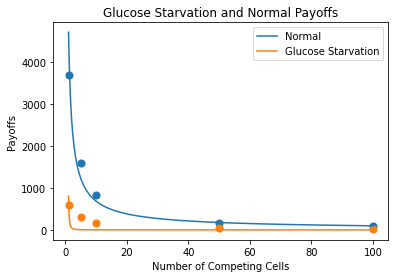

In [271]:
data1 = np.array([[1, 3700],[5, 1588],[10, 827],[50,172],[100,86]])
data2 = np.array([[1, 606],[5, 303],[10, 172],[50,38],[100,19]])
ar = np.linspace(1,100,1000)
x1, y1 = data1.T
x2, y2 = data2.T
plt.scatter(x1,y1,s=50)
plt.scatter(x2,y2,s=50)
plt.title('Glucose Starvation and Normal Payoffs')#,pad=20)
plt.ylabel('Payoffs')
plt.xlabel('Number of Competing Cells')
plt.plot(ar,4722*ar**(-0.838),label='Normal')
plt.plot(ar,806.88**ar**(-0.774),label='Glucose Starvation')
plt.legend()
plt.show()

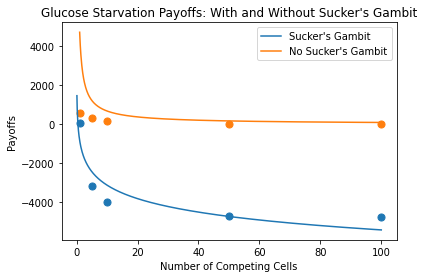

In [272]:
data1 = np.array([[1, 75],[5, -3156],[10, -3966],[50,-4671],[100,-4762]])
data2 = np.array([[1, 606],[5, 303],[10, 172],[50,38],[100,19]])
ar1 = np.linspace(.1,100,1000)
ar2 = np.linspace(1,100,1000)
x1, y1 = data1.T
x2, y2 = data2.T
plt.scatter(x1,y1,s=50)
plt.scatter(x2,y2,s=50)
plt.title('Glucose Starvation Payoffs: With and Without Sucker\'s Gambit')#,pad=20)
plt.ylabel('Payoffs')
plt.xlabel('Number of Competing Cells')
plt.plot(ar1,-995.6*np.log(ar1)-821.02,label='Sucker\'s Gambit')
plt.plot(ar2,4722*ar2**(-0.838),label='No Sucker\'s Gambit')
plt.legend()
plt.show()

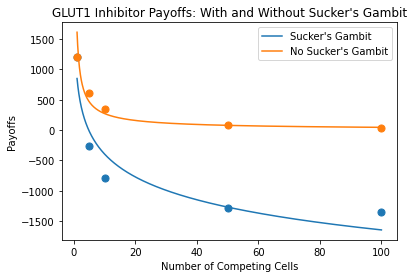

In [273]:
data1 = np.array([[1, 1206],[5, -260],[10, -793],[50,-1287],[100,-1353]])
data2 = np.array([[1, 1212],[5, 607],[10, 344],[50,76],[100,38]])
ar1 = np.linspace(1,100,1000)
ar2 = np.linspace(1,100,1000)
x1, y1 = data1.T
x2, y2 = data2.T
plt.scatter(x1,y1,s=50)
plt.scatter(x2,y2,s=50)
plt.title('GLUT1 Inhibitor Payoffs: With and Without Sucker\'s Gambit')#,pad=20)
plt.ylabel('Payoffs')
plt.xlabel('Number of Competing Cells')
plt.plot(ar1,-542.5*np.log(ar1)+851.23,label='Sucker\'s Gambit')
plt.plot(ar2,1614.7*ar2**(-0.774),label='No Sucker\'s Gambit')
plt.legend()
plt.show()